In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.preprocessing import RobustScaler ,StandardScaler
from sklearn.metrics import (confusion_matrix, classification_report, roc_auc_score,
                             precision_recall_curve, auc, RocCurveDisplay, PrecisionRecallDisplay)
from sklearn.ensemble import IsolationForest
from sklearn.metrics import precision_recall_fscore_support
import xgboost as xgb
import pickle

In [18]:
df= pd.read_csv(r"c:\Users\91996\Downloads\Datasets\archive\creditcard.csv")
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [20]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [21]:
df.duplicated().sum()

np.int64(1081)

In [22]:
df = df.drop_duplicates()
print("After removing duplicates:", df.duplicated().sum())


After removing duplicates: 0


In [23]:
df.Class.value_counts()

Class
0    283253
1       473
Name: count, dtype: int64

In [24]:
print(df['Class'].value_counts(normalize=True) * 100)

Class
0    99.83329
1     0.16671
Name: proportion, dtype: float64


In [25]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,...,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000
mean,94811.077600,0.005917,-0.004135,0.001613,-0.002966,0.001828,-0.001139,0.001801,-0.000854,-0.001596,...,-0.000371,-0.000015,0.000198,0.000214,-0.000232,0.000149,0.001763,0.000547,88.472687,0.001667
std,47481.047891,1.948026,1.646703,1.508682,1.414184,1.377008,1.331931,1.227664,1.179054,1.095492,...,0.723909,0.724550,0.623702,0.605627,0.521220,0.482053,0.395744,0.328027,250.399437,0.040796
min,0.000000,-56.407510,-72.715728,-48.325589,-5.683171,-113.743307,-26.160506,-43.557242,-73.216718,-13.434066,...,-34.830382,-10.933144,-44.807735,-2.836627,-10.295397,-2.604551,-22.565679,-15.430084,0.000000,0.000000
25%,54204.750000,-0.915951,-0.600321,-0.889682,-0.850134,-0.689830,-0.769031,-0.552509,-0.208828,-0.644221,...,-0.228305,-0.542700,-0.161703,-0.354453,-0.317485,-0.326763,-0.070641,-0.052818,5.600000,0.000000
50%,84692.500000,0.020384,0.063949,0.179963,-0.022248,-0.053468,-0.275168,0.040859,0.021898,-0.052596,...,-0.029441,0.006675,-0.011159,0.041016,0.016278,-0.052172,0.001479,0.011288,22.000000,0.000000
75%,139298.000000,1.316068,0.800283,1.026960,0.739647,0.612218,0.396792,0.570474,0.325704,0.595977,...,0.186194,0.528245,0.147748,0.439738,0.350667,0.240261,0.091208,0.078276,77.510000,0.000000
max,172792.000000,2.454930,22.057729,9.382558,16.875344,34.801666,73.301626,120.589494,20.007208,15.594995,...,27.202839,10.503090,22.528412,4.584549,7.519589,3.517346,31.612198,33.847808,25691.160000,1.000000


In [26]:
df['Amount_log'] = np.log1p(df['Amount'])
df['Time_hour'] = ((df['Time'] % 86400) // 3600).astype(int)
features = [c for c in df.columns if c not in ['Class']]


In [27]:
# scale Time and Amount_log
scaler = StandardScaler()
df[['Amount_log', 'Time']] = scaler.fit_transform(df[['Amount_log', 'Time']])

In [28]:
X = df[features]
y = df['Class']

In [29]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,stratify=y,random_state=42)

In [30]:
 #handle class imbalance using scale_pos_weight for XGBoost
neg = (y_train == 0).sum()
pos = (y_train == 1).sum()
scale_pos_weight = neg / pos
print("train class counts, neg pos", neg, pos, "scale_pos_weight", scale_pos_weight)

train class counts, neg pos 226602 378 scale_pos_weight 599.4761904761905


In [31]:
# baseline XGBoost
clf = xgb.XGBClassifier(
    objective='binary:logistic',
    eval_metric='auc',
    scale_pos_weight=scale_pos_weight,
    random_state=42,
    n_jobs=-1
)

clf.fit(X_train, y_train)

,objective,'binary:logistic'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,'auc'


In [32]:
# 4 Evaluate baseline
y_pred = clf.predict(X_test)
y_prob = clf.predict_proba(X_test)[:,1]
print("Classification report (baseline)")
print(classification_report(y_test, y_pred, digits=4))
print("AUC ROC:", roc_auc_score(y_test, y_prob))

Classification report (baseline)
              precision    recall  f1-score   support

           0     0.9996    0.9999    0.9998     56651
           1     0.9367    0.7789    0.8506        95

    accuracy                         0.9995     56746
   macro avg     0.9682    0.8894    0.9252     56746
weighted avg     0.9995    0.9995    0.9995     56746

AUC ROC: 0.9725427804033747


In [33]:
precision, recall, f1, support = precision_recall_fscore_support(y_test, y_pred, average=None)
print("minority class metrics")
print("precision", precision[1], "recall", recall[1], "f1", f1[1], "support", support[1])

minority class metrics
precision 0.9367088607594937 recall 0.7789473684210526 f1 0.8505747126436781 support 95


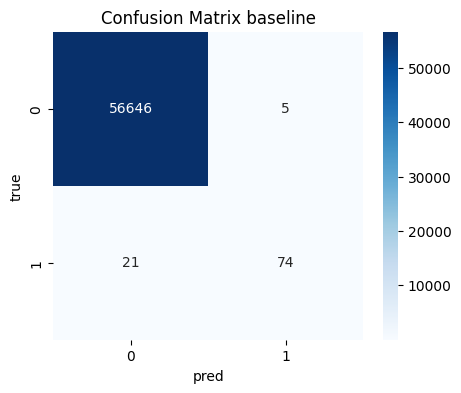

In [34]:
# confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("pred")
plt.ylabel("true")
plt.title("Confusion Matrix baseline")
plt.show()

In [35]:
# 3 Improve with hyperparameter tuning (simple grid)
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [3, 6],
    'learning_rate': [0.1, 0.01],
    'subsample': [0.8, 1.0]
}

xgb_clf = xgb.XGBClassifier(
    objective='binary:logistic',
    eval_metric='auc',
    scale_pos_weight=scale_pos_weight,
    random_state=42,
    n_jobs=-1
)

cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)
grid = GridSearchCV(xgb_clf, param_grid, scoring='roc_auc', cv=cv, verbose=1)
grid.fit(X_train, y_train)

print("best params", grid.best_params_)
best = grid.best_estimator_


Fitting 3 folds for each of 16 candidates, totalling 48 fits
best params {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100, 'subsample': 0.8}


Classification report (tuned)
              precision    recall  f1-score   support

           0     0.9997    0.9951    0.9974     56651
           1     0.2247    0.8421    0.3548        95

    accuracy                         0.9949     56746
   macro avg     0.6122    0.9186    0.6761     56746
weighted avg     0.9984    0.9949    0.9963     56746

AUC ROC tuned: 0.9713090956725806
minority class tuned metrics
precision 0.2247191011235955 recall 0.8421052631578947 f1 0.35476718403547675 support 95


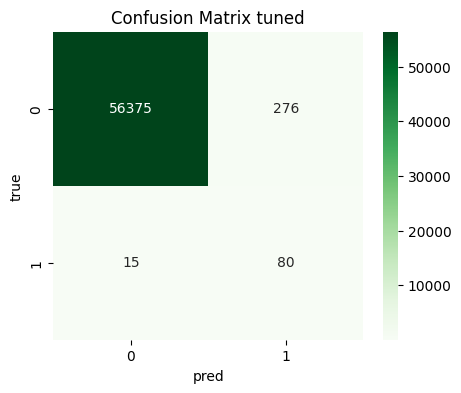

In [36]:
# evaluate tuned model
y_pred_t = best.predict(X_test)
y_prob_t = best.predict_proba(X_test)[:,1]
print("Classification report (tuned)")
print(classification_report(y_test, y_pred_t, digits=4))
print("AUC ROC tuned:", roc_auc_score(y_test, y_prob_t))
precision_t, recall_t, f1_t, support_t = precision_recall_fscore_support(y_test, y_pred_t, average=None)
print("minority class tuned metrics")
print("precision", precision_t[1], "recall", recall_t[1], "f1", f1_t[1], "support", support_t[1])

cm_t = confusion_matrix(y_test, y_pred_t)
plt.figure(figsize=(5,4))
sns.heatmap(cm_t, annot=True, fmt='d', cmap='Greens')
plt.xlabel("pred")
plt.ylabel("true")
plt.title("Confusion Matrix tuned")
plt.show()


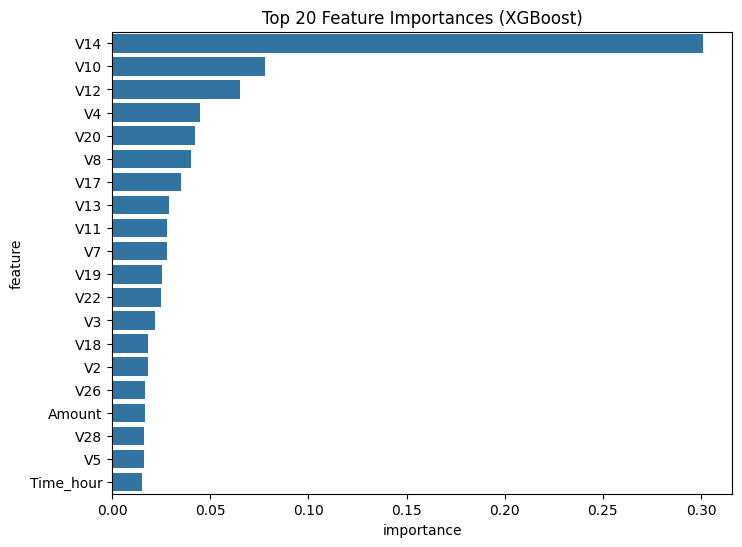

Top features:
      feature  importance
14        V14    0.300760
10        V10    0.077856
12        V12    0.064988
4          V4    0.044583
20        V20    0.042138
8          V8    0.040093
17        V17    0.034883
13        V13    0.028778
11        V11    0.027897
7          V7    0.027842
19        V19    0.025474
22        V22    0.025181
3          V3    0.022135
18        V18    0.018283
2          V2    0.018140
26        V26    0.016857
29     Amount    0.016544
28        V28    0.016245
5          V5    0.016047
31  Time_hour    0.015513

Simulating real-time predictions...
Batch 0 → Fraud predicted: 3
Batch 500 → Fraud predicted: 3
Batch 1000 → Fraud predicted: 3
Batch 1500 → Fraud predicted: 2
Batch 2000 → Fraud predicted: 4
Batch 2500 → Fraud predicted: 2
Batch 3000 → Fraud predicted: 4
Batch 3500 → Fraud predicted: 2
Batch 4000 → Fraud predicted: 3
Batch 4500 → Fraud predicted: 2
Batch 5000 → Fraud predicted: 1
Batch 5500 → Fraud predicted: 7
Batch 6000 → Fraud pred

In [37]:
# 5 Feature importance
fi = best.feature_importances_
fi_df = pd.DataFrame({
    'feature': X_train.columns,
    'importance': fi
}).sort_values('importance', ascending=False).head(20)

plt.figure(figsize=(8,6))
sns.barplot(x='importance', y='feature', data=fi_df)
plt.title("Top 20 Feature Importances (XGBoost)")
plt.show()

print("Top features:")
print(fi_df)

# Real-time simulation
def simulate_real_time(model, df_stream, batch_size=100, threshold=0.5):
    for start in range(0, len(df_stream), batch_size):
        batch = df_stream.iloc[start:start+batch_size]
        Xb = batch[features]
        probs = model.predict_proba(Xb)[:,1]
        preds = (probs > threshold).astype(int)
        out = batch.copy()
        out['pred_prob'] = probs
        out['pred'] = preds
        print(f"Batch {start} → Fraud predicted: {out['pred'].sum()}")
        # In production, push 'out' to alerting system instead of print

print("\nSimulating real-time predictions...")
simulate_real_time(
    best,
    X_test.reset_index(drop=True).join(y_test.reset_index(drop=True)),
    batch_size=500
)


In [38]:

# Save model
with open("xgb_Credit_card_fraud_model.pkl", "wb") as f:
    pickle.dump(best, f)

print("Model saved as xgb_Credit_card_fraud_model")


Model saved as xgb_Credit_card_fraud_model
